Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "YuhaoQian_13011456"
COLLABORATORS = "MeifangLi_13043390"

---

# Homework Set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 2, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

YOUR ANSWER HERE
YuhaoQian_13011456
MeifangLi_13043390

Run the following cell to import the necessary packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## NumPy in single-precision floating point numbers
Working with real numbers on a computer can sometimes be counter-intuitive. Not every real number cannot be represented exactly, because that would require an infinite amount of memory. Real numbers are in Python represented as "double-precision floating point numbers" that approximate the real numbers they represent. As such, the usual "rules of mathematics" no longer hold for very small or very large numbers:

In [3]:
print("very small numbers:")
print(1 - 1)          # Should be zero
print(1 - 1 + 1e-17)  # Should be 10 ** -17, i.e. a very small number
print(1 + 1e-17 - 1)  # Should *also* be 10**-17, but is it?

print("very large numbers:")
print(2.0**53)        # Some very large number
print(2.0**53 + 1.0)  # Some very large number + 1

very small numbers:
0
1e-17
0.0
very large numbers:
9007199254740992.0
9007199254740992.0


Usually, you don't have to worry about these rounding errors. But in scientific computing, these rounding errors sometimes become important. To reveal this problem more directly, we can decrease the precision of these approximations, using "single precision" instead of double precision floating point numbers, by employing `np.single`:

In [4]:
print(1.0 + 10**-9)             # Should be slightly above 1
print(np.single(1.0 + 10**-9))  # But in single precision, it is exactly 1.

1.000000001
1.0


Today we will practice with these single-precision floating point numbers. One thing to keep in mind is that Python will *really* try to work with double-precision floats:

In [5]:
a = 5.0
b = np.single(5.0)
print("a and b represent the same value:", a == b)
print("but they are of different types:", type(a), type(b))
print("If I add zero to a, its type does not change: ", type(a) == type(a + 0.0))
print("If I add zero to b, its type *does* change:   ", type(b) == type(b + 0.0))

a and b represent the same value: True
but they are of different types: <class 'float'> <class 'numpy.float32'>
If I add zero to a, its type does not change:  True
If I add zero to b, its type *does* change:    False


So we have to be extra careful when working with these single-precision numbers, to prevent these types changing. See the difference between `S` and `T` below.

In [6]:
S = 0.0
S += np.single(5.0)
print(type(S))

T = np.single(0.0)
T += np.single(5.0)
print(type(T))

<class 'numpy.float64'>
<class 'numpy.float32'>


## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


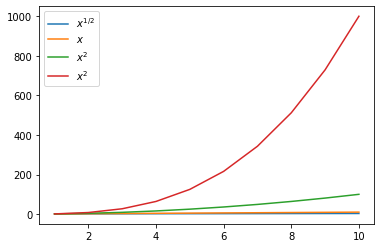

In [7]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

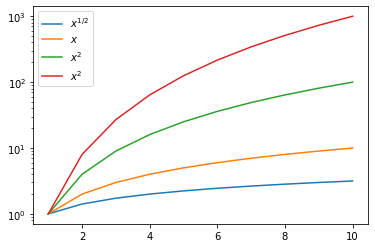

In [8]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


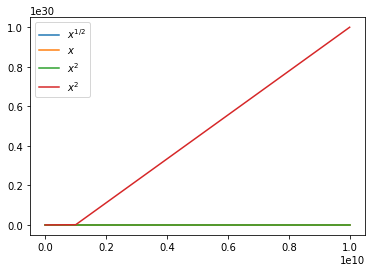

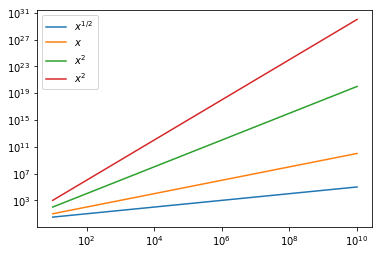

In [9]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

# Exercise 1

For $x \in [-1,1]$, the arctangent function can be expressed as a Taylor series
  $$
    \arctan(x) = \sum_{n=0}^\infty (-1)^n \frac{x^{2n+1}}{(2n+1)} .
  $$
  Inserting $x=1$ results in the following infinite sum for
  $\frac{\pi}{4}$
  $$
    \frac{\pi}{4}  = \sum_{n=0}^\infty (-1)^n \frac{1}{(2n+1)} .
  $$
  Approximations of $\frac{\pi}{4}$ can be obtained by computing
  finite sums, where we take the first $N$ terms, with $N$ large
  $$
    S_N = \sum_{n=0}^{N-1} a_n , \qquad a_n = (-1)^n \frac{1}{(2n+1)}
  $$
  N.B. In the exercise below **implement the sums yourself and sum the arguments in increasing order of the summation index**.

## (a) 2 points
1. Finish the function `compute_SN` below that computes the sum $S_N$ using double-precision numbers (`np.double`).
2. Use this function to compute the sum $S_N$ for $N \in \{10^1, 10^2, 10^3, \ldots, 10^7\}$ and store these values.

In [10]:
def compute_SN(N):
    # YOUR CODE HERE
    sn=np.double(0)
    for n in range(N):
        a=np.double((-1)**n /(2*n+1))
        sn=sn+a
    return np.double(sn)

# Compute the sums and store in a variable.
# YOUR CODE HERE
N=np.logspace(1,7,7) #10^1,10^2,...,10^7
double_SN=[] #store S_N
print('N:',N) 
for i in range(len(N)):
    SN=compute_SN(np.int(N[i]))
    double_SN.append(SN)
print('Double pricision SN:',double_SN)

N: [1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07]
Double pricision SN: [0.7604599047323508, 0.7828982258896384, 0.7851481634599485, 0.7853731633975086, 0.7853956633974299, 0.7853979133974436, 0.7853981383974479]


## (b) 2 points
1. Finish `compute_SN_single` below that computes the sum $S_N$ using single-precision numbers (`np.single`).
2. Use `compute_SN_single` to compute $S_N$ for the same set of $N$s as above. Use a log-log plot to visualize the errors $|S_N - \tfrac{\pi}{4}|$ for both double- and single-precision.

Single pricision SN: [0.7604599, 0.7828981, 0.78514814, 0.78537464, 0.78539646, 0.78539884, 0.7853992]


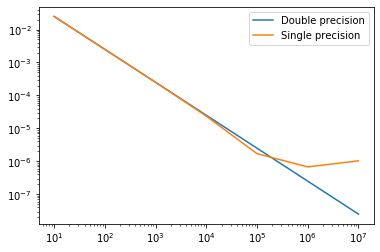

In [17]:
def compute_SN_single(N):
    # YOUR CODE HERE
    sn=np.single(0)
    for n in range(N):
        a=np.single((-1)**n /(2*n+1))
        sn=sn+a
    return np.single(sn)

# Compute the S_N and plot the results.
# YOUR CODE HERE
single_SN=[] #store S_N
for i in range(len(N)):
    SN=compute_SN_single(np.int(N[i]))
    single_SN.append(SN)
print('Single pricision SN:',single_SN)

double_SN[:]=[np.abs(x-np.pi/4) for x in double_SN] #compute error
single_SN[:]=[np.abs(x-np.pi/4) for x in single_SN]
plt.loglog(N,double_SN,label='Double precision')
plt.loglog(N,single_SN,label='Single precision')
plt.legend()
plt.show()

## (c) 2 points
Let $b_n = a_{2n} + a_{2n+1}$, and let $T_N = \sum_{n=0}^{N/2-1} b_n$.
1. Explain that for even $N$, $T_N = S_N$, and compute the sum $b_n= a_{2n} + a_{2n+1}$ analytically.
2. Now compute the sum $T_N$ for $N \in \{10^1, 10^2, 10^3, \ldots, 10^7\}$ using single-precision numbers and this analytical expression, and visualize the errors in a log-log plot.

Write your answer to subquestion 1 here.
YOUR ANSWER HERE

\begin{align}
\ T_N &\ = b_0+b_1+b_2+...+b_{N/2-1} \\
\ &\ = (a_0+a_1)+(a_2+a_3)+(a_4+a_5)+...+(a_{N-2}+a_{N-1}) \\
\ &\ = \sum_{n=0}^{N-1} {a_n} \\
\ &\ = S_N
\end{align}

Single pricision TN: [0.77290595, 0.7841482, 0.78527266, 0.785346, 0.785346, 0.785346, 0.785346]


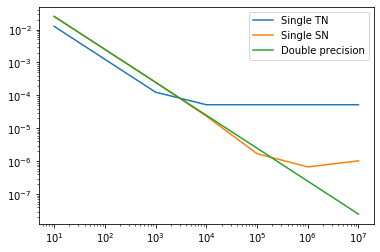

In [19]:
# Write your answer to subquestion 2 here.

# YOUR CODE HERE
def compute_TN_single(N):
    TN=np.single(0)
    for n in range(N):
        if (N % 2) == 0:
            bn = (-1) ** (2 * n) / (4 * n + 1) \
                 + (-1) ** (2 * n + 1) / (4 * n + 3)
            TN=TN+np.single(bn)
        else:
            break
    return np.single(TN)

single_TN=[]
for i in range(len(N)):
    TN=compute_TN_single(np.int(N[i]))
    single_TN.append(TN)
print('Single pricision TN:',single_TN)

single_SN[:]=[np.abs(x-np.pi/4) for x in single_SN]
single_TN[:]=[np.abs(x-np.pi/4) for x in single_TN]
double_SN[:]=[np.abs(x-np.pi/4) for x in double_SN]
plt.loglog(N,single_TN,label='Single TN')
plt.loglog(N,single_SN,label='Single SN')
plt.loglog(N,double_SN,label='Double precision')
plt.legend()
plt.show()

# (d) 1 point
Explain the differences you found in the results from (b) and (c).

YOUR ANSWER HERE

Compared with double precision, the absolute errors for both single precision methods would decline as N grows until N reach a certain magnitude, which is $T_N$ at $N=10^4$ and $S_N$ at $N=10^6$. When $N \leq 10^3$, the absolute error for $T_N$ is smaller than that for $S_N$. When $N \geq 10^4$, the absolute error for $T_N$ is larger than that for $S_N$.

## (e) 2 points
Use the following _compensated summation_ algorithm (due to Kahan) to sum the $a_n$, again using only single precision. Visualize the errors in a log-log plot.

$
s = x_1\\
c = 0\\
\textbf{for } i = 2 \textbf{ to } n\\
\quad y = x_i - c\\
\quad t = s+y\\
\quad c = (t-s) - y\\
\quad s = t\\
\textbf{end}
$

Summation sum: [0.7604599, 0.7828982, 0.78514814, 0.78537315, 0.7853956, 0.7853979, 0.7853981]


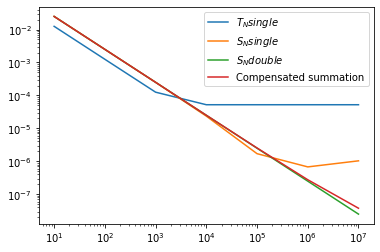

In [21]:
# YOUR CODE HERE
def compute_summation_sum_single(N):
    s=1
    c=0
    for n in range(1,N):
        y=np.single((-1)**n /(2*n+1))-np.single(c)
        t=np.single(s+y)
        c=np.single((t-s)-y)
        s=np.single(t)
    return np.single(s)

summation_SN=[]
for i in range(len(N)):
    SN=compute_summation_sum_single(np.int(N[i]))
    summation_SN.append(SN)
print('Summation sum:',summation_SN)

single_SN[:]=[np.abs(x-np.pi/4) for x in single_SN]
single_TN[:]=[np.abs(x-np.pi/4) for x in single_TN]
double_SN[:]=[np.abs(x-np.pi/4) for x in double_SN]
summation_SN[:]=[np.abs(x-np.pi/4) for x in summation_SN]
plt.loglog(N,single_TN,label= r'$T_N single$')
plt.loglog(N,single_SN,label= r'$S_N single$')
plt.loglog(N,double_SN,label= r'$S_N double$')
plt.loglog(N,summation_SN,label='Compensated summation')
plt.legend()
plt.show()

# (f) 1 point
Explain the differences you found in the results from (b) and (e).

YOUR ANSWER HERE

Using the compensated summation algorithm, the absolute error declines continuously as the magnitude of N increases, whereas the error for (b) starts to increase when $N$ reaches at $10^6$. When $N \leq 10^3$, the absolute error for both (b) and (e) is the same. When $N=10^4$ and $N=10^5$, the absolute error for single precision of compensated summation algorithm is larger than that for single precision $S_N$. When $N \geq 10^6$, the absolute error for single precision of compensated summation algorithm is smaller than that for single precision $S_N$.
